In [319]:
#Chapter - 2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

#Get the data

In [320]:
#importing and exploring dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
housing_data = pd.read_csv(url)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#Explore the Data Structure

In [321]:
#information about the dataframe
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [322]:
#exploring different categories with number of entries in each category in the categorical column
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: >

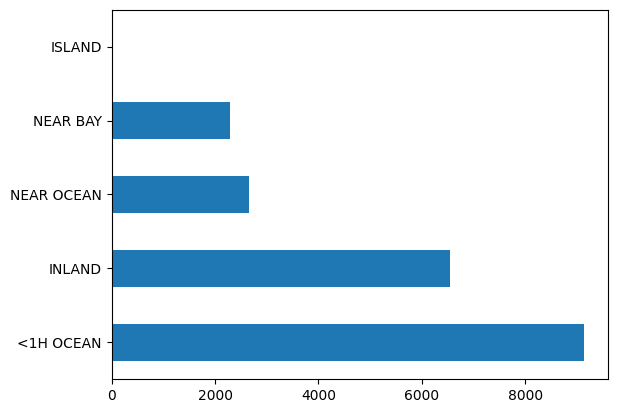

In [323]:
#visualizing categories in the categorical column
housing_data['ocean_proximity'].value_counts().plot(kind = 'barh')

In [324]:
#descriptive statistics of all the numerical columns of the housing dataset
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

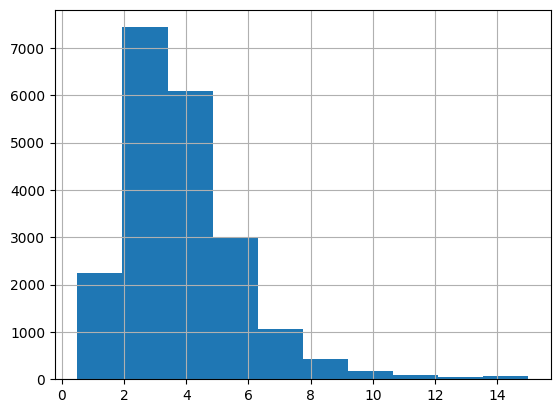

In [325]:
#current solution: experts tells that median income is an important determinant for the price of a house. Therefore, we group of the values in the column median income into different groups
housing_data['median_income'].hist()


In [326]:
#created a new column (income_category) assigned bins using pd.cut function. It will help to create bins for the values
housing_data['income_category'] = pd.cut(housing_data['median_income'],
                                         bins = [0.,1.5,3.0,4.5,6.0, np.inf],
                                         labels = [1,2,3,4,5])
housing_data['income_category'].value_counts()



3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

<Axes: >

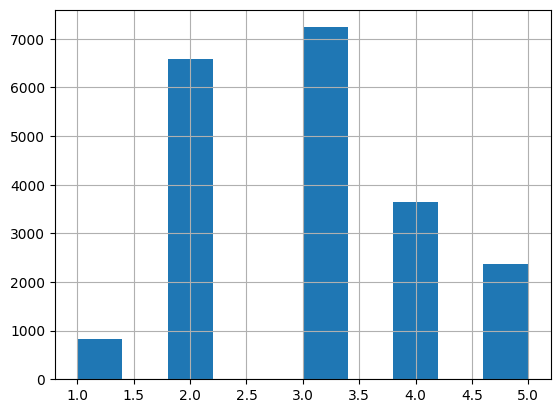

In [327]:
housing_data['income_category'].hist() # more clear visualization that indicates that most people are in the middle income level

#Creating test set

In [328]:
#first step of preparing data for visualization process
#we have created a X dataset and a y dataset as features (columns) and labels
y = housing_data['median_house_value'] # what we are going to predict (labels)
X = housing_data.drop('median_house_value',axis = 1) #what we use to predict (features)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [330]:
#split dataset into training and testing modules
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state=42) # train test split - splits the dataset horizontally into training set and testing set at 33%. This training set will be input to train machine learning models. To check the accuracy of the machine learning model, we check on the test set to predict the values to make sure the model is not overfitting.
X_train # randomly pick the rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
5088,-118.28,33.98,19.0,883.0,313.0,726.0,277.0,0.9809,<1H OCEAN,1
17096,-122.23,37.46,33.0,2643.0,464.0,1015.0,427.0,4.2232,NEAR OCEAN,3
5617,-118.26,33.79,42.0,1162.0,264.0,1044.0,241.0,3.5488,<1H OCEAN,3
20060,-119.26,35.87,24.0,1590.0,390.0,1686.0,372.0,1.6469,INLAND,2
895,-121.96,37.54,14.0,5106.0,1207.0,2738.0,1108.0,3.9909,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,5
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,3
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,2
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,4


<Axes: >

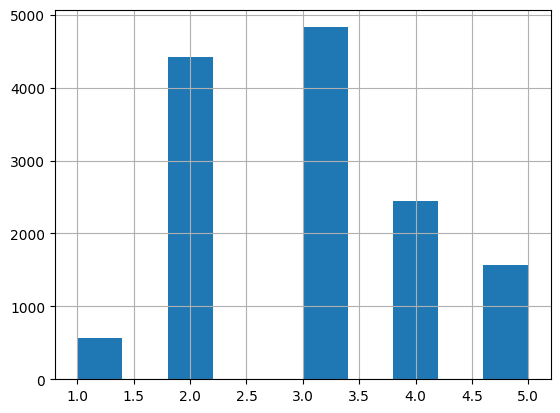

In [155]:
X_train['income_category'].hist() # to check if the values in the income_categoy column in the training set is approximately equal to testing set

<Axes: >

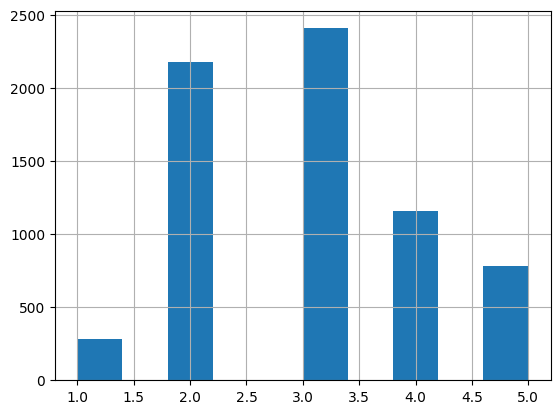

In [335]:
X_test['income_category'].hist()

In [336]:
#stratified split
#split the data using income_category column to make sure that the approx percentages of income_category are evenly distributed in test set and train set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing_data, housing_data ['income_category']):
  strat_train_set = housing_data.loc[train_index]
  strat_test_set = housing_data.loc[test_index]

In [337]:
 strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [338]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [339]:
strat_train_set['income_category'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_category, dtype: float64

In [340]:
strat_test_set['income_category'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_category, dtype: float64

In [341]:
housing_data['income_category'].value_counts()/len(housing_data)# these three results shows that the stratified split divided the dataset into train and test set with approximately same distribution of values for each category in income_category variable.

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

#comparison of overall percentage error of overall dataset, stratified split and random split

In [342]:
#comparison of overall percentage error of overall dataset, stratified split and random split
def income_cat_proportions(data):
    return data["income_category"].value_counts() / len(data)

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [343]:
#dropping income_category variable
strat_train_set.drop('income_category', axis='columns', inplace=True)
strat_test_set.drop('income_category', axis='columns', inplace=True)

#visualizing the data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

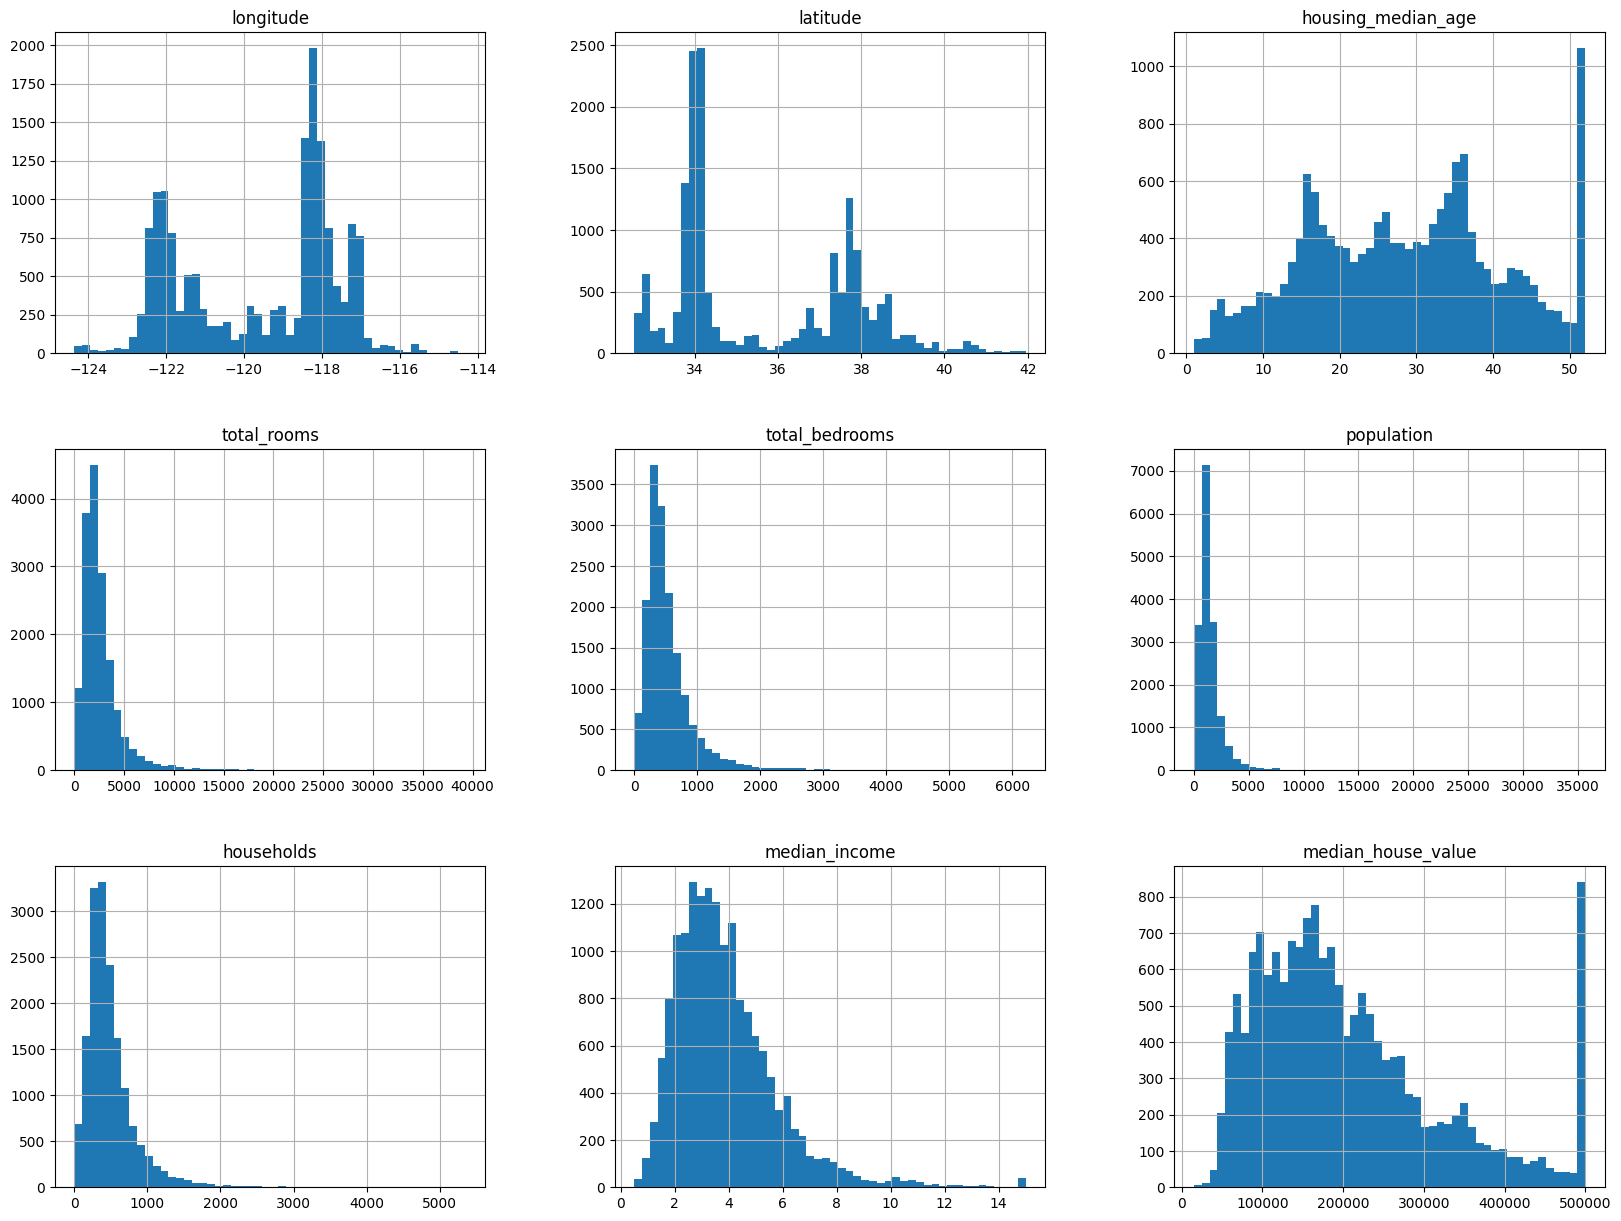

In [344]:
#visualizing the data - Histograms
housing = strat_train_set.copy()
housing.hist(bins=50, figsize=(20,15))

<Axes: >

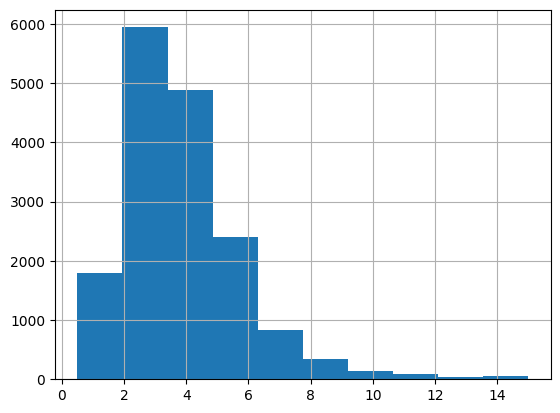

In [345]:
housing["median_income"].hist()

<Axes: xlabel='longitude', ylabel='latitude'>

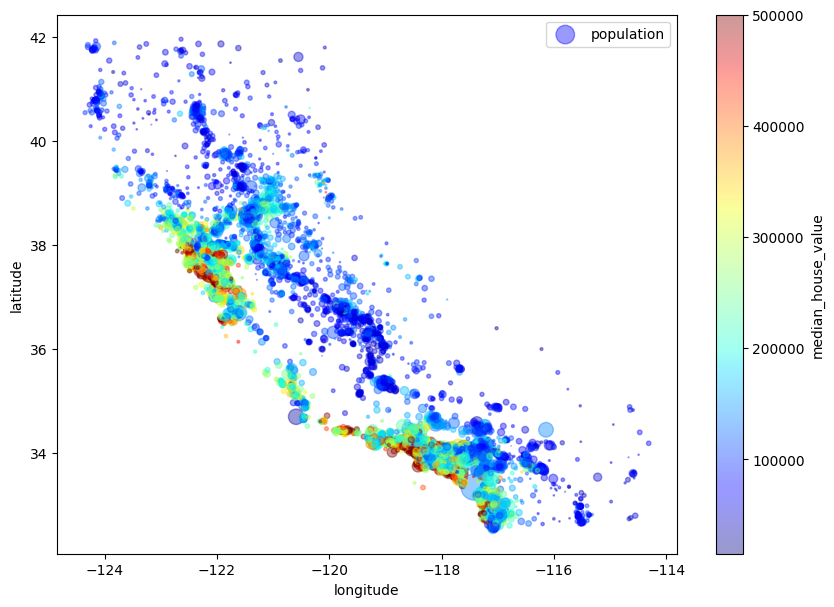

In [346]:
# plotting Geographic Data
#since our dataset has latitude and longitude values
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
             s = housing['population']/100, label = 'population', figsize = (10,7),
             c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True,
             sharex = False)

In [347]:
import plotly.express as px
px.scatter_geo(housing_data, lat="latitude", lon="longitude", color="median_house_value", size="population")

#relationship analysis between variables

In [348]:
#correlation matrices to assess the relationship between variables
housing.corr()

<ipython-input-348-609e10b49f8b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<ipython-input-349-9dda52e80fc4>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

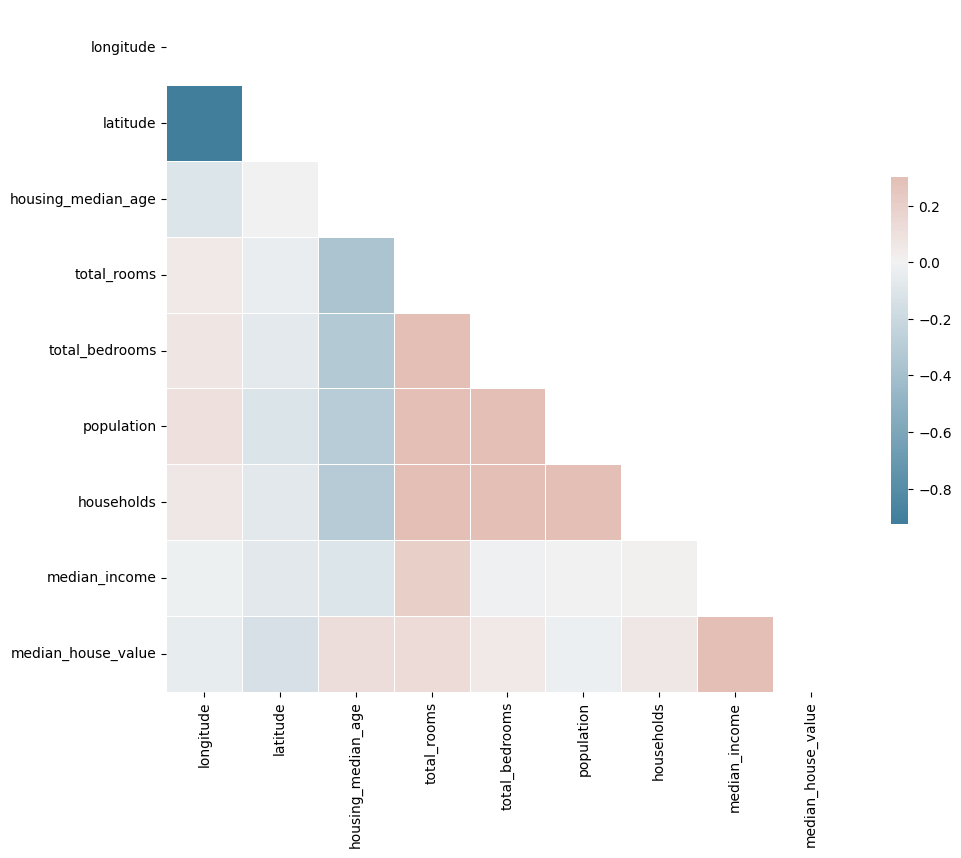

In [349]:
#visualization of correlation matrix
import seaborn as sns
corr = housing.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0,
            square = True, linewidth = 0.5, cbar_kws = {'shrink': 0.5})

#preparing data for machine learning

In [351]:
# Preparing Data for Machine learning
#feature engineering = creating new features (columns) out of our raw data using domain knowledge
#imputation = inserting values where they might be mising to have a complete dataset
#encoding categorical variables = transforming categorical variables into some numerical variation
#scaling = applying scaler that transforms all of our data on the same numerical scale
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()



In [352]:
#dealing with missing values
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [353]:
#Option - 1: dropping rows with missing values
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [354]:
#Option - 2: dropping columns with missing values
sample_incomplete_rows.drop("total_bedrooms", axis=1)  #however, this column is important for prediction

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [355]:
#Option - 3: imputation with median
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [225]:
# import simpleimputer from sklearn and create imputer object to fit it to housing dataset and transforming the data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')#use the median in place of missing values

In [357]:
#only keep numerical columns
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [227]:
#fitting imputer with dataset with numerical columns
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [358]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [359]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]
#to avoid transforming dataset into numpy arrays

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [360]:
imputer.strategy

'median'

In [361]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [362]:
#Encode categorical variables = For ML model the dataset should be numerical variables. Therefore, we encode categorical variables into numerical codes

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [363]:
#encoding with ordinal encoder (used for ordinal dataset eg. good, better, best) as variables as categorical values
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_category_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_category_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [365]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [367]:
#encoding with onehotencoder since the variables does not a ordinal values
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse = False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot #creates a 'dense array' that all instances have a value not just the ones that are encoded. This will create an array or each category and assign codes for the values

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [368]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#feature engineering

In [370]:
#feature engineering = art/science of using domain knowledge to create new features of data using raw data. This can be key to improving the performance of machine learning models.
def feature_engineering (data):
  data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
  data["population_per_household"] = data["population"] / data["households"]
  data["rooms_per_household"] = data["total_rooms"] / data["households"]

  return data

  #defined a function that created 3 new columns.

In [371]:
#combining different features in different proportions inorder to get a feature which is a better predictor in machine learning algorithms
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


In [372]:
#scaling our data:
#many machine learing algorithms doesn't work well with unscaled data. For example, the magnitude of values in the 'total_rooms' feature is going to be substantially higer than the that in the 'median_income' feature. Because of this we will need to scale our values. There are multiple ways to accomplish this, and we will use the StandardScalar which will scale our values to their z-score within their columns like so:
#z = (x-u)/s. x is the value we're scaling, u is the median of the column and s is the standard deviation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

In [373]:
#concatenating with categorical variables
ml_input_data = np.hstack([housing_cat_1hot, housing_scaled])

In [374]:
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


In [375]:
#pipelines:
#pipelines are a feature built into sklearn that allows us to easily apply a number of transformations one after another. This is a stack of the steps one after another

housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)

    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

In [376]:
cat_encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

#select and train the models

In [377]:
#select and train a model
#transforming the data using the pipeline created
#we have to create a clean training set to 'train' our machine learning regressors, and a 'test' set to test the accuracy of said regressors. Let's input our stratified samples into 'pipeline'
train_data, train_labels, features= data_transformations(strat_train_set)
train_data


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [378]:
train_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [379]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

In [380]:
test_labels

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: median_house_value, Length: 4128, dtype: float64

In [381]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [382]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()#created the object
lin_reg.fit(train_data, train_labels)#fit to train data with train labels

LinearRegression()

In [383]:
# Compare the model against Test Data

original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])# takes first 5 values from the test data and lin_reg predicts the test labels (median house values)

comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,421436.985982,78564.014018
17352,162500.0,288955.577066,-126455.577066
3505,204600.0,244465.297215,-39865.297215
7777,159700.0,195506.027223,-35806.027223
14155,184000.0,259951.750767,-75951.750767


In [396]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

78489.87096668076

In [397]:
# Metrics

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

71328.5332577832

In [400]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)#random_state allows same results every time.
tree_reg.fit(train_data, train_labels)# fitting tree_reg object with train_data and train_labels

DecisionTreeRegressor(random_state=42)

In [399]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [388]:
#error of 0 indicates overfitting the data
#Cross Validation K-Fold Cross Validation will split our training dataset into 10 sections (K=10) as 9 training sections and 1 test section and run same algorithm 10 times to rigorously evaluate the model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [401]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70819.83674558 70585.09139446 69861.50467212 73083.46385442
 66246.62162221 74093.76616605 77298.21284135 70265.05374821
 70413.46481703 72693.02785945]
Mean: 71536.00437208822
Standard deviation: 2802.723447985299


In [402]:
lin_scores = cross_val_score(lin_reg, train_data, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71970.62302082 64914.42079347 69359.9804826  68887.54180717
 66988.50031949 72778.86882574 70303.29013317 69196.0211199
 66771.01333718 70565.63793275]
Mean: 69173.58977723011
Standard deviation: 2298.6959556931574


In [391]:
#Random Forest Regressor - Group of decision tree regressors runs one after the other
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [392]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18797.81343373367

In [394]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51667.47890087 49581.77674843 46845.77133522 52127.48739086
 48082.89639917 51050.84681689 53027.94987383 50218.59780997
 48609.03966622 54669.97457167]
Mean: 50588.18195131385
Standard deviation: 2273.9929947683154


In [403]:
scores = cross_val_score(lin_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69173.589777
std       2423.038289
min      64914.420793
25%      67463.260691
50%      69278.000801
75%      70500.050983
max      72778.868826
dtype: float64

#fine tuning the model

In [405]:
#Fine Tuning the model
#after selection of models we'll have to fime-tune the hyperparameters (parameters that aren't affected by training) to find the best ones to use for the model. GridSearch from SKlearn accomplish this
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [407]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [408]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [409]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64441.33583774864 {'max_features': 2, 'n_estimators': 3}
55010.78729315784 {'max_features': 2, 'n_estimators': 10}
52756.90743676946 {'max_features': 2, 'n_estimators': 30}
60419.95105027927 {'max_features': 4, 'n_estimators': 3}
52548.760723492225 {'max_features': 4, 'n_estimators': 10}
50475.03023921768 {'max_features': 4, 'n_estimators': 30}
58658.87553276854 {'max_features': 6, 'n_estimators': 3}
51688.259845013825 {'max_features': 6, 'n_estimators': 10}
49602.83903888296 {'max_features': 6, 'n_estimators': 30}
57764.545176887186 {'max_features': 8, 'n_estimators': 3}
51906.606161086886 {'max_features': 8, 'n_estimators': 10}
49851.77165193962 {'max_features': 8, 'n_estimators': 30}
63137.43571927858 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54419.40582754731 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58195.29390064867 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52168.74519952844 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [410]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.083951,0.004824,0.006091,0.000652,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.094088e+09,-3.701893e+09,...,-4.152686e+09,2.564139e+08,18,-1.120130e+09,-1.095790e+09,-1.132094e+09,-1.176269e+09,-1.121152e+09,-1.129087e+09,2.640853e+07
1,0.263424,0.003480,0.013206,0.001363,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.970210e+09,-2.920099e+09,...,-3.026187e+09,9.517266e+07,11,-5.710653e+08,-5.732697e+08,-5.938710e+08,-5.909882e+08,-5.970375e+08,-5.852464e+08,1.087131e+07
2,1.050182,0.178102,0.042603,0.006667,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.757089e+09,-2.695824e+09,...,-2.783291e+09,9.766273e+07,9,-4.345880e+08,-4.372516e+08,-4.355848e+08,-4.348115e+08,-4.407693e+08,-4.366010e+08,2.284079e+06
3,0.134757,0.006411,0.005537,0.000597,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.739305e+09,-3.453554e+09,...,-3.650570e+09,1.567023e+08,16,-1.033917e+09,-1.025859e+09,-9.509278e+08,-9.789355e+08,-9.988662e+08,-9.977011e+08,3.048182e+07
4,0.774320,0.192906,0.021318,0.004928,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.774614e+09,-2.715229e+09,...,-2.761372e+09,1.177235e+08,8,-5.106846e+08,-5.406298e+08,-5.039097e+08,-5.253607e+08,-5.336332e+08,-5.228436e+08,1.375091e+07
5,1.930880,0.641550,0.043909,0.006197,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.558975e+09,-2.443052e+09,...,-2.547729e+09,1.043837e+08,3,-3.851322e+08,-3.974866e+08,-3.849539e+08,-3.882619e+08,-3.934907e+08,-3.898651e+08,4.905561e+06
6,0.169346,0.003847,0.004745,0.000522,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.590876e+09,-3.341284e+09,...,-3.440864e+09,1.044087e+08,14,-9.127519e+08,-9.396161e+08,-8.570217e+08,-9.053142e+08,-9.165255e+08,-9.062459e+08,2.714946e+07
7,0.564456,0.006386,0.012755,0.001281,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.723446e+09,-2.593712e+09,...,-2.671676e+09,1.309912e+08,4,-4.900412e+08,-5.171047e+08,-4.779660e+08,-4.969112e+08,-5.094824e+08,-4.983011e+08,1.387280e+07
8,1.985589,0.326064,0.037811,0.004725,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.472257e+09,-2.369335e+09,...,-2.460442e+09,9.252659e+07,1,-3.740409e+08,-3.831060e+08,-3.835964e+08,-3.687507e+08,-3.818289e+08,-3.782646e+08,5.880922e+06
9,0.217814,0.004674,0.004469,0.000102,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.344547e+09,-3.154085e+09,...,-3.336743e+09,9.768474e+07,12,-8.541704e+08,-9.124260e+08,-9.442119e+08,-8.793192e+08,-8.832932e+08,-8.946842e+08,3.090299e+07


In [411]:
#Randomized search - allows to easily find hyperparameters by random picking and trying
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef3190d6a10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef3190d5570>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [413]:
feature_importances = grid_search.best_estimator_.feature_importances_ #
feature_importances

array([8.46978272e-02, 7.69983975e-02, 4.08715796e-02, 1.67325719e-02,
       1.71418340e-02, 1.73518185e-02, 1.56303531e-02, 3.39824215e-01,
       2.30528104e-02, 1.04033701e-01, 8.64983594e-02, 1.29273143e-02,
       1.54663950e-01, 7.22217547e-05, 3.62205279e-03, 5.88099358e-03])

In [414]:
#Feature Importance List
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.0846978271965227),
 ('latitude', 0.07699839747855737),
 ('housing_median_age', 0.040871579612884096),
 ('total_rooms', 0.016732571900462085),
 ('total_bedrooms', 0.01714183399184058),
 ('population', 0.0173518184721046),
 ('households', 0.015630353131298083),
 ('median_income', 0.3398242154869636),
 ('bedrooms_per_household', 0.023052810363875926),
 ('population_per_household', 0.10403370064780083),
 ('rooms_per_household', 0.08649835942626646),
 ('<1H OCEAN', 0.012927314349565632),
 ('INLAND', 0.15466394981681342),
 ('ISLAND', 7.222175467748088e-05),
 ('NEAR BAY', 0.003622052794433035),
 ('NEAR OCEAN', 0.005880993575933964)]

<BarContainer object of 16 artists>

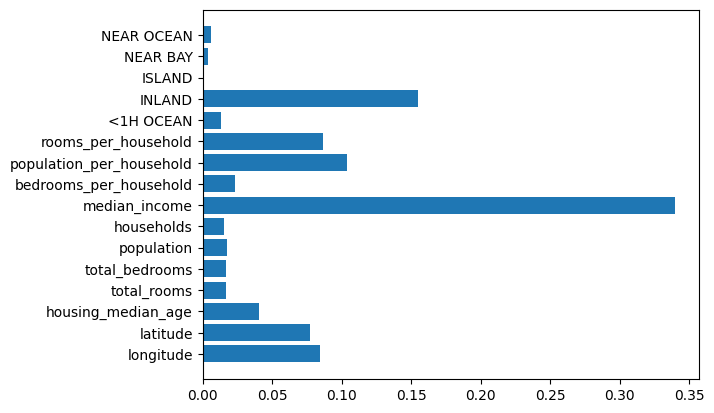

In [415]:
plt.barh(y=features, width=feature_importances.tolist())

In [416]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [417]:
final_rmse

63301.179203602675